# Determinantes del ingreso

Modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales.

### 1. Preliminares

A continuación se presentan las características del problema y el proceso de trabajo

#### 1.1 Problema

El problema corresponde a uno de classificación, ya que la variable objetivo "income" toma sólo dos valores posibles: <=50k o >50k, dependiendo si el individuo en cuestión percibe ingresos anuales superiores a dicha cantidad.

Dado ello, la variable objetivo es una variable categórica.

Enunciado: Modelo que define si un individuo presenta salarios mayores (>50K) o menores (<=50K) a 50.000 dólares anuales.

#### 1.2 Atributos disponibles

Para explicar el salario que presenta un individuo, existen los siguientes atributos disponibles:

* age: variable tipo entero que define la edad.
* workclass: variable categórica que define la naturaleza de la organización bajo la cual esta empleado.
* education: variable categórica que define el nivel educacional (bachillerato, masters, doctorado, etc).
* capital-gains: variable tipo entero que registra los ingresos generados fuera del trabajo.
* capital-losses: variable tipo entero que registra pérdidas de inversiones fuera del trabajo.
* fnlwgt: variable tipo entero que es un ponderador muestral.
* marital-status: variable categórica que define el estado civil.
* occupation: variable categórica que define la ocupación del individuo.
* relationship: categórica. Define la relación respecto a su familia.
* race: categórica. Especifica la raza.
* sex: categórica. Define el sexo.
* hours-per-week: entero. Detalla la cantidad de horas trabajadas por semana.
* native-country: categórica. Define el país de origen.

En cuanto a la variable objetivo:

* income: variable categórica que define como <=50K si el individuo percibe ingresos inferiores a 50.000 dólares anuales, o >50K si el individuo percibe ingresos superiores a 50.000 dólares anuales.

#### 1.3 Métricas para medir desempeño

Las métricas de precision y recall serán la base de nuestra medición de desempeño. Podemos describir cada una como:

* Precision: Fracción de etiquetas correctas entre las etiquetas positivas.

* Recall: Fracción de verdaderos positivos.

Ahora que las conocemos, detallamos la medida F1-score, la cual promedia ponderadamente las tendencias de precision y recall. Dado ello, nos permite obtener una visión global de cómo esta explicando nuestro modelo.

Además, usaremos la curva roc, la cual es una curva de probabilidad que muestra que tan bien nuestro modelo es capaz de diferenciar las clases estimadas comparando falsos positivos vs verdaderos positivos.

### 2. Aspectos computacionales

#### 2.1 Librerias a utilizar

Las librerias y versiones utilizadas son:

* numpy 
* pandas
* matplotlib
* seaborn
* warnings
* sklearn

Además, trabajaremos con la versión de Python 3.8.3.

In [1]:
#!python pip3 -m freeze

#### 2.2 Proceso tentativo recodificación de atributos

Se hará un análisis exploratorio tanto de la variable objetivo como de sus atributos donde:

* Se identificará la presencia de valores nulos, perdidos o caracteres incorrectos, y serán eliminados del modelo ya que nos generan problemas en la estimación. En esta etapa, se utilizará la función importada "calidad_datos" que nos permite tener una perspectiva global.

* Recodificación de clases: occupation, workclass, education, marital-status, native-country, e income; siguiendo las nomenclaturas especificadas.

* Exploración de correlaciones entre atributos y variable objetivo. La idea es identificar atributos que se correlacionan fuertemente y débilmente, para considerar excluirlas del modelo.

* Transformación de variables categóricas aplicando binary encoding. Se utiliza binary encoding por sobre one hot encoding ya que este último incorpora colinealidad al modelo. Se hará mediante pd.get_dummies(drop_first=True).

* La variable objetivo será transformada a valores binarios, tomando el valor 1 si el salario anual es mayor a 50 mil dólares, y 0 en cualquiera de los otros casos.

* Exploración de variables numéricas para identificar las escalas en las cuales se encuentran. Si se identifica la presencia de valores muy grandes en ciertos atributos, y valores muy pequeños en otros, se hará uso de StandardScaler() de la librería Sklearn para estandarizar los datos (restando la media y dividiendo por la desviación estándar).


#### 2.3 Importación de librerías

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, classification_report

from calidad_datos import calidad_datos

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 70
warnings.filterwarnings('ignore')

### 3. Descripción

In [3]:
# importación de datos
df = pd.read_csv('income-db.csv')

#### 3.1 Inspección visual vector objetivo

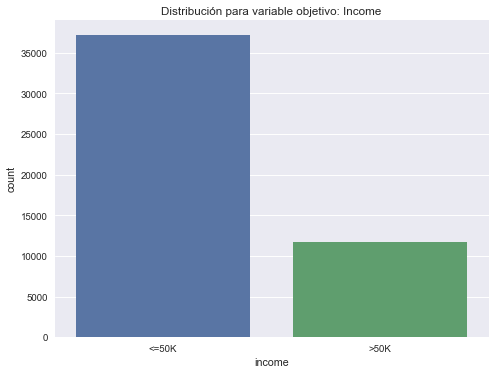

In [13]:
# balance de clases en la variable objetivo
sns.countplot(x=df['income'])
plt.title(f'Distribución para variable objetivo: Income')
plt.show()

In [33]:
print('Número de individuos con un salario menor o igual a 50K: {}'.format(round(df[df['income'] == '<=50K'].shape[0]/len(df), 2)))
print('Número de individuos con un salario mayor a 50K: {}'.format(round(df[df['income'] == '>50K'].shape[0]/len(df), 2)))

Número de individuos con un salario menor o igual a 50K: 0.76
Número de individuos con un salario mayor a 50K: 0.24


A partir del gráfico anterior, identificamos que las clases se encuentran levemente desbalanceadas, pero la diferencia no constituye un inconveniente para ejectuar nuestro análisis estadístico.

#### 3.2 Visualizaciónes entre atributos y/o variable objetivo

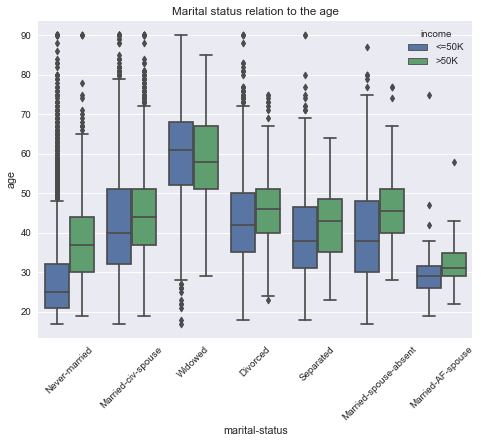

In [53]:
# relacion entre estado civil y edad
sns.boxplot(x='marital-status', y='age', hue='income', data=df)
plt.xticks(rotation=45)
plt.title('Marital status relation to the age')
plt.show()

El gráfico muestra resultados esperables de acuerdo a la sociedad. Por lo general personas viudas tienden a tener mayor edad, solteros son considerados los más jovenes, separados después de unos años de matrimonio, y divorciados ya a edades mayores también.

Además, independiente del estado civil, los salarios mayores a 50k tienden a relacionarse con una mayor edad.

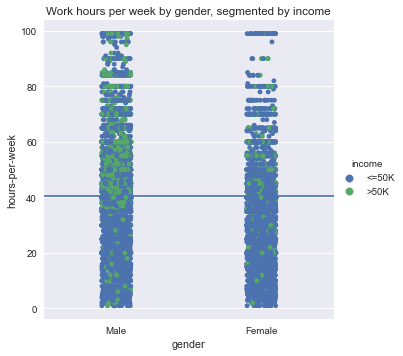

In [52]:
# distribución de hombres y mujeres por país

sns.catplot(x='gender', y='hours-per-week', hue='income', data=df)
plt.axhline(df['hours-per-week'].mean())
plt.title('Work hours per week by gender, segmented by income')
plt.show()

En el gráfico identificamos que los hombres tienden a trabajar un mayor número de horas a la semana en comparación a las mujeres. Además, la tendencia a tener salarios anuales mayores a 50k se relaciona mucho con trabajar un mayor número de horas semanales que la media (~40 hrs). Por último, los salarios mayores a 50k están concontrados principalmente en hombres que trabajan una cantidad mayor o igual a 40 hrs semanales.

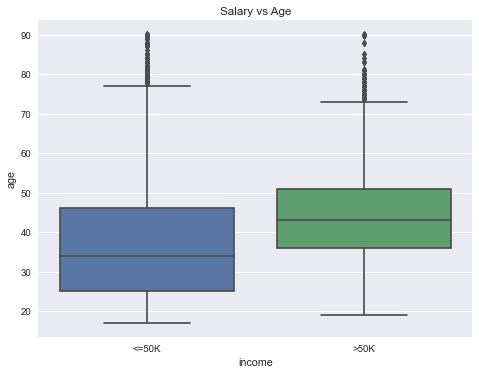

In [57]:
# relacion del salario anual vs edad
sns.boxplot(x='income', y='age', data=df)
plt.title('Salary vs Age')
plt.show()

Este gráfico confirma la presencia de salarios mayores a una mayor edad. Podemos partir por mirar una mayor mediana.

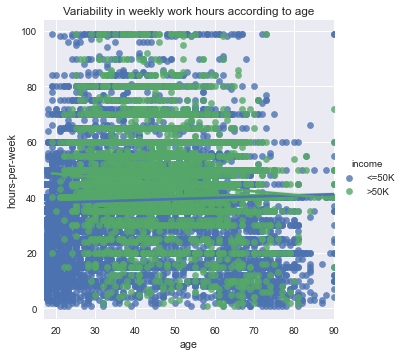

In [59]:
sns.lmplot(x='age', y='hours-per-week', hue='income', data=df)
plt.title('Variability in weekly work hours according to age')
plt.show()

Este gráfico nos presenta una recta con pendiente positiva (leve) para describir la interacción entre la edad y las horas trabajadas, donde mayores salarios se ven principalmente en mayores horas semanales de trabajo entre los 30 y 60 años.

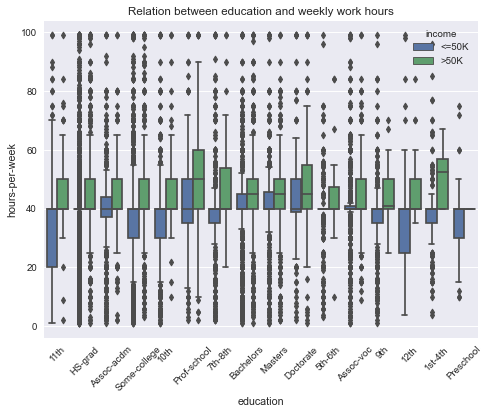

In [61]:
sns.boxplot(x='education', y='hours-per-week', hue='income', data=df)
plt.title('Relation between education and weekly work hours')
plt.xticks(rotation=45)
plt.show()

#### 3.3 Inspección de valores nulos

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 4. Modelación descriptiva

### 5. Modelación predictiva